In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import os
import json
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Reaction

0 66 ja3066978-Table-c1.png


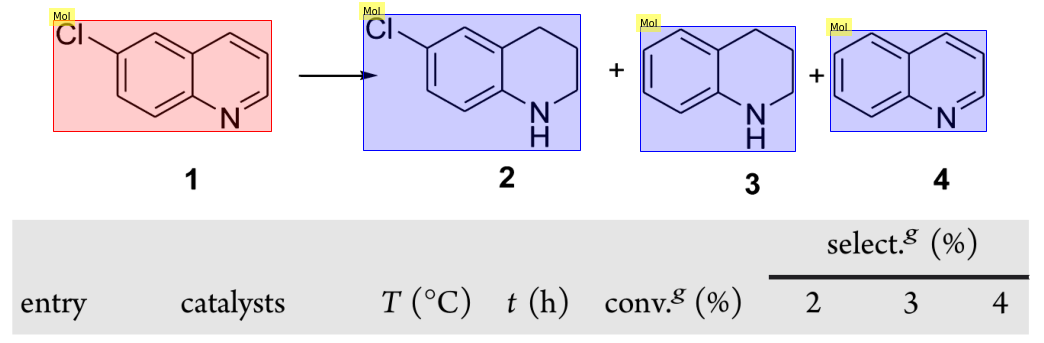

1 511 ol051488h-Table-c1.png


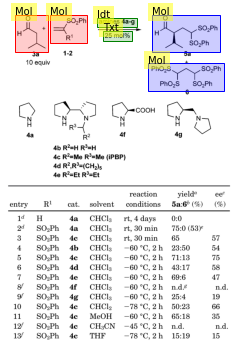

2 1061 jo201996w-Scheme-c5.png


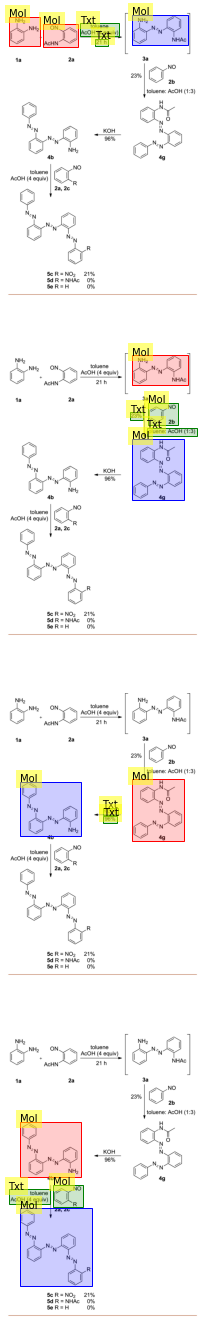

In [7]:
from rxnscribe.data import ReactionImageData

image_base = '../data/parse/images/'
data_path = '../data/parse/train.json'

with open(data_path) as f:
    data = json.load(f)

cnt = 0
for idx, image_data in enumerate(data['images']):
    path = image_base + image_data['file_name']
    img = cv2.imread(path)
    height, width, _ = img.shape
    d = ReactionImageData(image_data)
    n = len(d.gold_reactions)
    print(idx, image_data['id'], image_data['file_name'])
    fig, axes = plt.subplots(n, 1, figsize=(20,n*6))
    if n == 1:
        axes = [axes]
    for i, r in enumerate(d.gold_reactions):
        ax = axes[i]
        ax.set_axis_off()
        ax.imshow(img)
        r.draw(ax)
    plt.show()
    cnt += 1
    if cnt == 3:
        break